In [219]:
import numpy as np
import matplotlib.pyplot as plt


In [220]:
# Step 1: Generate Input and Output Data
x = np.arange(0.1, 1.0, 1/22)
y = (1 + 0.6 * np.sin(2 * np.pi * x / 0.7)) + 0.3 * np.sin(2 * np.pi * x)
y /= 2  # Normalize the output

# Step 2: Initialize RBF Parameters
np.random.seed(42)  # For reproducibility
c1, r1 = np.random.rand(), 0.1  # Random center for first RBF
c2, r2 = np.random.rand(), 0.1  # Random center for second RBF
learning_rate = 0.0001
epochs = 20

In [221]:
# Step 3: Define the RBF function
def rbf(x, c, r):
    return np.exp(-((x - c) ** 2) / (2 * r ** 2))

# Step 4: Training Loop
for epoch in range(epochs):
    # Calculate RBF Outputs
    phi1 = rbf(x, c1, r1)
    phi2 = rbf(x, c2, r2)
    Phi = np.vstack([phi1, phi2]).T
     # Calculate Output
    w = np.random.rand(3)  # Initialize weights randomly
    Phi_with_bias = np.hstack([Phi, np.ones((Phi.shape[0], 1))])  # Add bias term
    y_pred = Phi_with_bias @ w

    # Calculate Error
    error = y - y_pred
    
    # Update weights using gradient descent
    gradient_w = -2 * Phi_with_bias.T @ error / len(x)
    w -= learning_rate * gradient_w

    # Update Centers and Radii (simplified)
    c1 -= learning_rate * np.mean(error * phi1 * (x - c1) / (r1**2))
    c2 -= learning_rate * np.mean(error * phi2 * (x - c2) / (r2**2))
    
    r1 -= learning_rate * np.mean(error * phi1 * ((x - c1)**2 / r1**3))
    r2 -= learning_rate * np.mean(error * phi2 * ((x - c2)**2 / r2**3))

In [222]:
# Step 5: Final Prediction
phi1_final = rbf(x, c1, r1)
phi2_final = rbf(x, c2, r2)
Phi_final = np.vstack([phi1_final, phi2_final]).T
Phi_final_with_bias = np.hstack([Phi_final, np.ones((Phi_final.shape[0], 1))])
y_final_pred = Phi_final_with_bias @ w


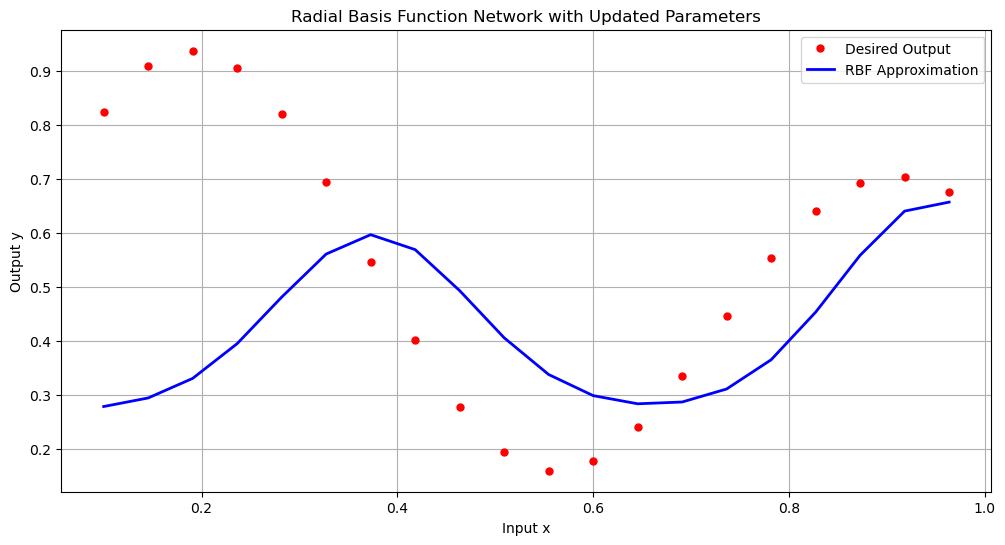

In [223]:
# Step 6: Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'ro', label='Desired Output', markersize=5)
plt.plot(x, y_final_pred, 'b-', label='RBF Approximation', linewidth=2)
plt.title('Radial Basis Function Network with Updated Parameters')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()
plt.grid()
plt.show()

In [224]:
# Output the final learned weights and parameters
print(f"Final Learned Weights: w1 = {w[0]}, w2 = {w[1]}, w0 = {w[2]}")
print(f"Final RBF Centers: c1 = {c1}, c2 = {c2}")
print(f"Final RBF Radii: r1 = {r1}, r2 = {r2}")

Final Learned Weights: w1 = 0.3253324754688536, w2 = 0.38868055191144013, w0 = 0.2713743714507214
Final RBF Centers: c1 = 0.3758055698073326, c2 = 0.9506276614193513
Final RBF Radii: r1 = 0.10027944105932551, r2 = 0.10010853639937932
